In [1]:
import sys
sys.path.insert(0,'../..')

In [2]:
import omama as O # importing the Omama package

In [3]:
omama_loader = O.OmamaLoader() # Subclass of DataLoader which helps set paths and env settings

In [4]:
data = O.Data(omama_loader, load_cache=True) # Loading close to a million images

In [5]:
print(data) # easily print the data that was loaded using print
len(data) # easily print the total number of images loaded

Data(namespace(dh_dh2=namespace(total=22144, 3D=9363, 2D=12781),
          dh_dh0new=namespace(total=126460, 3D=62736, 2D=63724),
          dh_dcm_ast=namespace(total=819387, 3D=58, 2D=819329),
          total_all_dicoms=967991,
          total_2d_all=895834,
          total_3d_all=72157,
          total_2d_cancer=14965,
          total_2d_preindex=1915,
          total_2d_noncancer=855763,
          total_3d_cancer=376,
          total_3d_preindex=0,
          total_3d_noncancer=67162,
          total_cancer=15341,
          total_preindex=1915,
          total_noncancer=922925,
          total_no_label=27810))


967991

In [6]:
# easily get 2D and 3D image
imgs2d = O.DataHelper.get2D(N=5, timing=True)

get2D                    ...took     3.297618 seconds


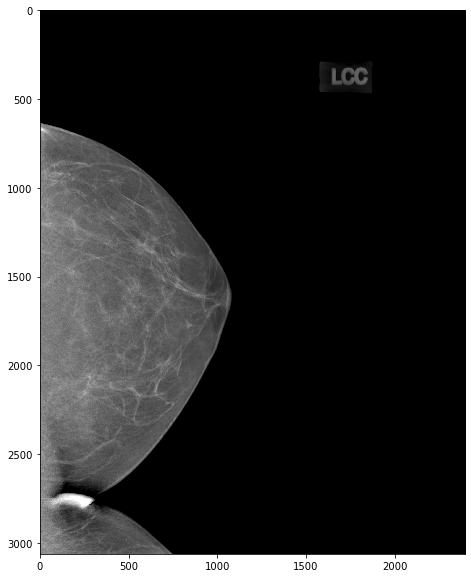

In [7]:
O.DataHelper.view(imgs2d[0]) # view single images

In [8]:
imgs3d = O.DataHelper.get3D(N=5, timing=True)

get3D                    ...took    73.524466 seconds


In [9]:
imgs = imgs2d + imgs3d # combine lists of images 

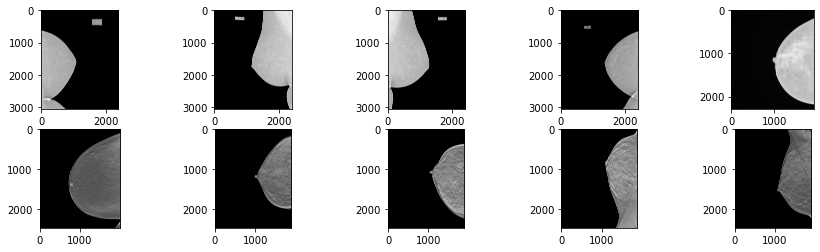

In [10]:
O.DataHelper.view_grid(imgs, slice_num=22) # print lists of images easily too!

In [11]:
# Filter the data api to contain specific images

data.filter_data(_3d=False, labels=["IndexCancer"], studies=["dh_dh2"], timing=True)

filter_images            ...took     0.163414 seconds


In [12]:
len(data) # Notice now there are only 37 images in the Data class

37

In [13]:
img_generator = data.next_image(_2d=True, timing=True) # build a generator with the images

In [14]:
# create a list of only the pixels from our images to use with ML algorithms
pixel_list = []
for i in range(36):
    pixel_list.append(next(img_generator).pixels)

In [15]:
pixel_list[2]

array([[   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [2677, 2721, 2706, ...,    0,    0,    0],
       [2802, 2756, 2718, ...,    0,    0,    0],
       [2834, 2795, 2756, ...,    0,    0,    0]], dtype=uint16)

In [16]:
pixel_list[35]

array([[  0,   0,   0, ..., 441, 512, 527],
       [  0,   0,   0, ..., 481, 533, 588],
       [  0,   0,   0, ..., 496, 505, 580],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint16)

In [17]:
data.reset_data() # To reset the Data just use the reset_data() method

In [18]:
len(data) # Notice the length is back to almost 1 million images.

967991